In [19]:
# Imports
from functions import *
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
from datascience import *
import pandas as pd

from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
import random

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [20]:
housing = pd.read_csv('Housing.csv')
housing_columns = housing.columns
housing_arr = housing.to_numpy()

In [21]:
conditions = [housing_arr == "no", housing_arr == "yes", housing_arr == 'furnished', housing_arr == 'semi-furnished', housing_arr == 'unfurnished']
values = [0, 1, 2, 1, 0]

housing_arr = np.select(conditions, values, housing_arr).astype('int')

In [22]:
housing_arr = standardize_data(housing_arr)

In [5]:
trials = 1000
results = pd.DataFrame([simulate(SimpleImputer(missing_values=np.nan, strategy='median'),housing_arr, trials), 
              simulate(SimpleImputer(missing_values=np.nan, strategy='mean'), housing_arr, trials),
              simulate(SimpleImputer(missing_values=np.nan, strategy='most_frequent'), housing_arr, trials),
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=3), housing_arr, trials),
              simulate(IterativeImputer(random_state=0), housing_arr, trials)
             ]).T
results.columns = ['Median', 'Mean', 'Mode', 'KNN-3', 'Iterative']

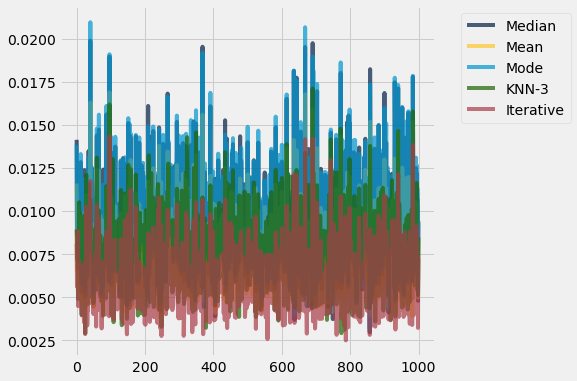

In [6]:
results_table = Table.from_df(results)
results_table.plot()

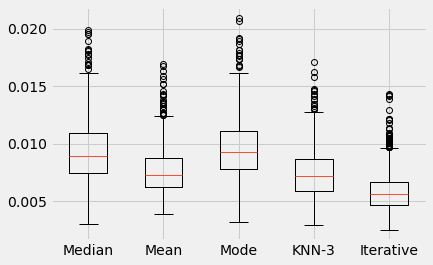

In [7]:
results_table.boxplot()

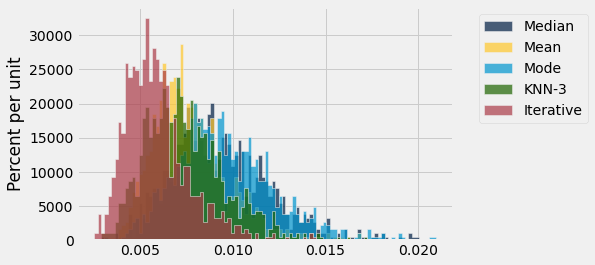

In [8]:
results_table.hist(bins=100)

In [9]:
trials = 1000
results_2 = pd.DataFrame([simulate(SimpleImputer(missing_values=np.nan, strategy='median'),housing_arr, trials,percent_missing=.5), 
              simulate(SimpleImputer(missing_values=np.nan, strategy='mean'), housing_arr, trials,percent_missing=.5),
              simulate(SimpleImputer(missing_values=np.nan, strategy='most_frequent'), housing_arr, trials,percent_missing=.5),
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=3), housing_arr, trials,percent_missing=.5),
              simulate(IterativeImputer(random_state=0), housing_arr, trials,percent_missing=.5)
             ]).T
results_2.columns = ['Median', 'Mean', 'Mode', 'KNN-3', 'Iterative']

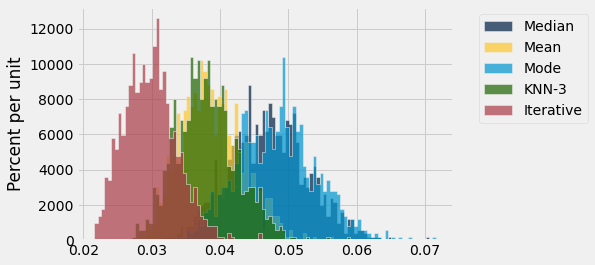

In [10]:
results_table_2 = Table.from_df(results_2)
results_table_2.hist(bins=100)

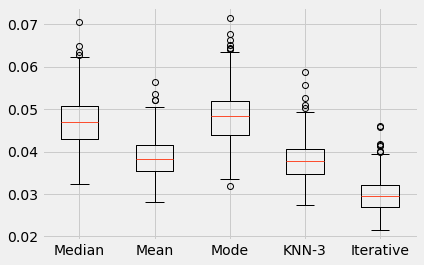

In [11]:
results_table_2.boxplot()

In [12]:
trials = 1000
results_3 = pd.DataFrame([simulate(SimpleImputer(missing_values=np.nan, strategy='median'),housing_arr, trials,remove_random_features_row_independent,.10), 
              simulate(SimpleImputer(missing_values=np.nan, strategy='mean'), housing_arr, trials, remove_random_features_row_independent, .10),
              simulate(SimpleImputer(missing_values=np.nan, strategy='most_frequent'), housing_arr, trials, remove_random_features_row_independent, .10),
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=3), housing_arr, trials, remove_random_features_row_independent, .10),
              simulate(IterativeImputer(random_state=0), housing_arr, trials, remove_random_features_row_independent, .10)
             ]).T
results_3.columns = ['Median', 'Mean', 'Mode', 'KNN-3', 'Iterative']

c:\Anaconda\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Anaconda\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Anaconda\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


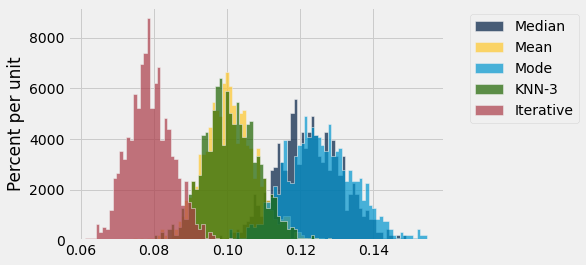

In [13]:
results_table_3 = Table.from_df(results_3)
results_table_3.hist(bins=100)

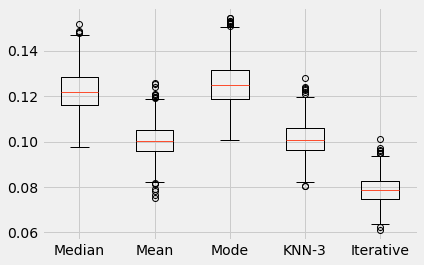

In [14]:
results_table_3.boxplot()

In [15]:
choose_best_k = pd.DataFrame([
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=1), housing_arr, trials),
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=2), housing_arr, trials),
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=3), housing_arr, trials),
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=4), housing_arr, trials),
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=5), housing_arr, trials), 
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=6), housing_arr, trials), 
             ]).T
choose_best_k.columns = ['K=1', 'K=2', 'K=3', 'K=4', 'K=5', 'K=6']

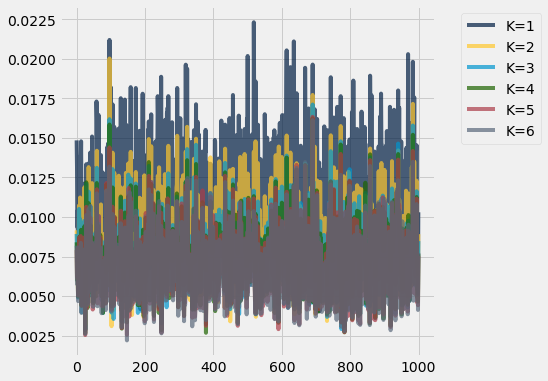

In [16]:
k_table = Table.from_df(choose_best_k)
k_table.plot()

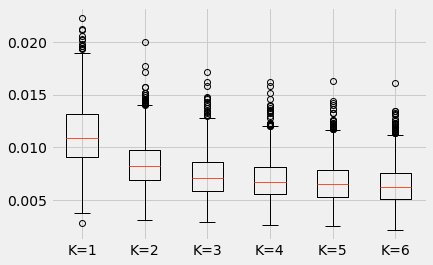

In [17]:
k_table.boxplot()

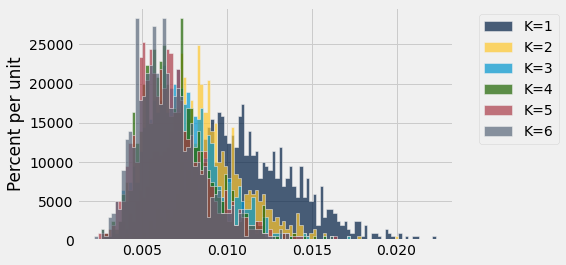

In [23]:
k_table.hist(bins=100)

In [24]:
k_table.mean()

K=1,K=2,K=3,K=4,K=5,K=6
0.0112134,0.00845157,0.00741538,0.00701824,0.00675603,0.00655073
